<a href="https://colab.research.google.com/github/aparnagkumar/Python/blob/master/Implement_RandomSearchCV_with_k_fold_cross_validation_on_KNN_without_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implement RandomSearchCV with k fold cross validation on KNN**# 

### Import libraries

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

### Make classification dataset

In [0]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

###Plotting the class labels

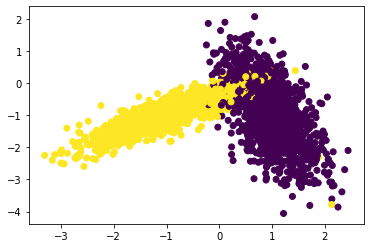

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

### Implementing Custom RandomSearchCV

In [0]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    params = np.random.choice(range(*param_range), 10, replace=False)
    #Splitting the training data into 'fold' number of groups 
    split_arrs = np.array_split(x_train,folds) 
    split_arrs_ClassLabel=np.array_split(y_train,folds)
    trainscores = []
    testscores  = []  
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(len(split_arrs)):
            for j in range(i+1,len(split_arrs)):
                X_train=np.concatenate([split_arrs[i],split_arrs[j]])
                Y_train=np.concatenate([split_arrs_ClassLabel[i],split_arrs_ClassLabel[j]])
                test_indices=[k for k in range(len(split_arrs)) if k not in (i,j)]
                X_test=np.concatenate([split_arrs[i] for i in test_indices]) #without np.concatenate the array dimention was 3d, which showed an error. Corrected the code from https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array
                Y_test=np.concatenate([split_arrs_ClassLabel[i] for i in test_indices])
                classifier.n_neighbors = k
                classifier.fit(X_train,Y_train)
                Y_predicted_test = classifier.predict(X_test)
                testscores_folds.append(accuracy_score(Y_predicted_test,Y_test))
                Y_predicted_train = classifier.predict(X_train)
                trainscores_folds.append(accuracy_score(Y_predicted_train,Y_train))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

In [4]:
clf=KNeighborsClassifier()
train_scores, cv_scores,param= RandomSearchCV(X_train, y_train, clf, (1, 50), 3) 

100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


### Hyper-parameter VS accuracy plot

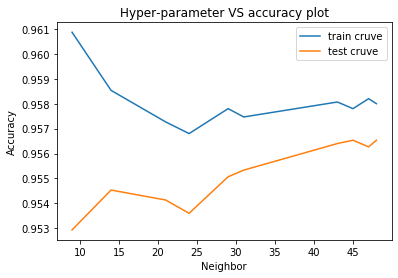

In [6]:
import seaborn as sns #Was showing weird plots when used matplotlib
sns.lineplot(param, train_scores, label= 'train cruve') 
sns.lineplot(param, cv_scores, label= 'test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel('Neighbor')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**The best value of K is the one at which the accuracy on CV is highest and the gap between the test and train curve is the lowest. Here, thus it can be concluded that the best value of k is 45.**

### Plotting the decision boundry

In [0]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

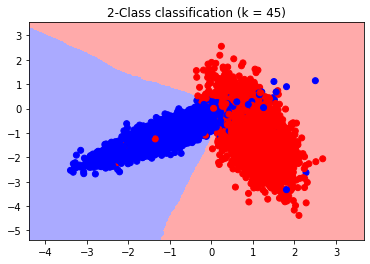

In [9]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

                                          ****************************************END********************************